In [72]:
# mostly testing the valentina dxf format
import dxfgrabber
fname = "../examples/valentina_sock.dxf"
d = dxfgrabber.readfile(fname)
print([b.name  for b in d.blocks])
print([(e.dxftype, e.name)  for e in d.entities])

['*Model_Space', '*Paper_Space', 'Detail']
[('INSERT', 'Detail'), ('INSERT', 'Detail'), ('INSERT', 'Detail')]


In [69]:
d.blocks.__dict__

{'_blocks': {'*Model_Space': <dxfgrabber.dxfentities.Block at 0x7f4dac2022b0>,
  '*Paper_Space': <dxfgrabber.dxfentities.Block at 0x7f4dac242940>,
  'Detail': <dxfgrabber.dxfentities.Block at 0x7f4dac202a90>}}

In [64]:
list(d.blocks)[2].__dict__

{'_entities': [<dxfgrabber.dxfentities.LWPolyline at 0x7f4dac202630>,
 'basepoint': (0.0, 0.0),
 'color': 256,
 'description': '',
 'dxftype': 'BLOCK',
 'extrusion': None,
 'flags': 0,
 'handle': '41',
 'invisible': 0,
 'layer': '1',
 'layout_tab_name': None,
 'line_weight': 0,
 'linetype': None,
 'ltscale': 1.0,
 'name': 'Detail',
 'owner': '40',
 'paperspace': None,
 'shadow_mode': None,
 'thickness': 0.0,
 'transparency': None,
 'true_color': None,
 'xrefpath': ''}

In [61]:
for b in list(d.blocks): #.__dict__
    print([b.name])

['*Model_Space']
['*Paper_Space']
['Detail']


In [47]:
import dxfgrabber
fname = "../examples/Problem splines.dxf"
#fname = "test1.dxf"
#fname = "/home/julian/data/aviansails/resailcuttinginstructions/2Rio15 Top surface front Mk9.dxf"
#fname = "/home/julian/data/aviansails/junk/EVO3 140 Full lower surface Mk17.dxf"
fname = "/home/julian/data/aviansails/podshapes/Pod-classic_1.dxf"
fname = "../examples/valentina_sock.dxf"
d = dxfgrabber.readfile(fname)

#es = [e  for e in list(d.blocks)[2]._entities  if e.dxftype == "LWPOLYLINE"]
#es
#e = es[0]
#e.is_closed
d.blocks

In [4]:
svgcols = ['lightblue', 'palegreen', 'mediumorchid', 'aquamarine', 'lightgoldenrodyellow', 'saddlebrown', 'brown', 'honeydew', 'mintcream', 'royalblue', 'steelblue', 'grey', 'darkgoldenrod', 'lavender', 'turquoise', 'cadetblue', 'lightslategray', 'maroon','palegoldenrod']
layercol = dict(zip(d.layers.names(), svgcols))
layercol.update({"PLOT-LINES":"green", "PLOTLINES":"green", "CUT-LINE":"blue"})


In [279]:
makesvg()
print("layers", d.layers.names())

layers ['0', '1', '11', '4', '7', '8']


In [255]:
[e.name  for e in list(d.blocks)]


['*Model_Space',
 '*Paper_Space',
 'Full side',
 'StrapDetail',
 'footplate_detail']

In [30]:
#dxf.header, dxf.layers, dxf.blocks, dxf.entities
e = list(d.blocks["footplate_detail"])[0]
#e.__dict__


In [37]:
e = list(d.entities)[0]
e.__dict__


{'attribs': [],
 'attribsfollow': False,
 'col_count': 1,
 'col_spacing': 0.0,
 'color': 256,
 'dxftype': 'INSERT',
 'extrusion': (0.0, 0.0, 1.0),
 'handle': '4C',
 'insert': (0.0, 0.0, 0.0),
 'invisible': 0,
 'layer': '1',
 'layout_tab_name': None,
 'line_weight': -1,
 'linetype': 'BYLAYER',
 'ltscale': 1.0,
 'name': 'Full side',
 'owner': None,
 'paperspace': None,
 'rotation': 0.0,
 'row_count': 1,
 'row_spacing': 0.0,
 'scale': (1.0, 1.0, 1.0),
 'shadow_mode': None,
 'thickness': 0.0,
 'transparency': None,
 'true_color': None}

In [5]:
ymm = 0
def preamble(d, f):
    minX = d.header['$EXTMIN'][0]
    minY = d.header['$EXTMIN'][1]
    maxX = d.header['$EXTMAX'][0]
    maxY = d.header['$EXTMAX'][1]
    SVG_PREAMBLE = '<svg xmlns="http://www.w3.org/2000/svg" version="1.1" viewBox="{0} {1} {2} {3}">\n'
    f(SVG_PREAMBLE.format(minX, -maxY, maxX - minX, maxY - minY))


In [11]:
import nurbs.Curve, nurbs.utilities
def splinepathtostring(e):
    curve = nurbs.Curve.Curve()
    curve.ctrlpts = [p[:2]  for p in e.control_points]
    curve.degree = e.degree
    curve.knotvector = e.knots
    curve.weights = e.weights
    curve.evaluate_rational()
    return "".join("%s%f %f" % ("M" if i==0 else "L", p[0], ymm-p[1])  for i, p in enumerate(curve.curvepts))

def Dsplinepathtostring(e):
    curve = nurbs.Curve.Curve()
    curve.ctrlpts = [p[:2]  for p in e.control_points]
    curve.degree = e.degree
    curve.knotvector = nurbs.utilities.knotvector_autogen(curve.degree, len(curve.ctrlpts))
    curve.weights = e.weights
    curve.evaluate_rational()
    return "".join("%s%f %f" % ("M" if i==0 else "L", p[0], ymm-p[1])  for i, p in enumerate(curve.curvepts))


In [7]:
import math
def arcpathstring(e):
    x1 = e.center[0] + e.radius * math.cos(math.radians(e.start_angle))
    y1 = e.center[1] + e.radius * math.sin(math.radians(e.start_angle))
    x2 = e.center[0] + e.radius * math.cos(math.radians(e.end_angle))
    y2 = e.center[1] + e.radius * math.sin(math.radians(e.end_angle))
    angdiff = e.end_angle - e.start_angle
    while angdiff >= 360: angdiff -= 360
    while angdiff < 0:  angdiff += 360
    return 'M {0} {1} A {2} {3} {4} {5} {6} {7} {8} '.format(x1, ymm-y1, 
            e.radius, e.radius, 0, int(angdiff > 180), 0, x2, ymm-y2)


In [8]:
#https://www.autodesk.com/techpubs/autocad/acad2000/dxf/entities_section.htm
SVG_LINE = '<line x1="{0}" y1="{1}" x2="{2}" y2="{3}" stroke="{4}" stroke-width="{5:.2f}" />\n'
SVG_PATH = '<path d="{0}" fill="none" stroke="{1}" stroke-width="{2:.2f}" />\n'
SVG_CIRCLE = '<circle cx="{0}" cy="{1}" r="{2}" stroke="{3}" stroke-width="{4}" fill="none" />\n'
def outent(d, e, f, th):
    if e.dxftype == "LINE":      
        f(SVG_LINE.format(e.start[0], ymm-e.start[1], e.end[0], ymm-e.end[1], 
                          layercol.get(e.layer, 'black'), th))
    elif e.dxftype == "ARC":
        f(SVG_PATH.format(arcpathstring(e), layercol.get(e.layer, 'black'), th))
    elif e.dxftype == "LWPOLYLINE":
        print(e.flags, len(e.points))
        e.points.append(e.points[-1])
        print(len(e.points))
        if (e.flags & 1) and e.points[-1] != e.points[0]:
            e.points.append(e.points[0])
            print("closing LWPOLYLINE")
        pth = "".join("%s%f %f" % ("M" if i==0 else "L", p[0], ymm-p[1])  for i, p in enumerate(e.points))
        f(SVG_PATH.format(pth, layercol.get(e.layer, 'black'), th))
    elif e.dxftype == "POLYLINE":  # this can do 2D meshes
        pth = "".join("%s%f %f" % ("M" if i==0 else "L", p[0], ymm-p[1])  for i, p in enumerate(e.points))
        f(SVG_PATH.format(pth, layercol.get(e.layer, 'black'), th))
    elif e.dxftype == "SPLINE":
        f(SVG_PATH.format(Dsplinepathtostring(e), "red", th))
        f(SVG_PATH.format(splinepathtostring(e), layercol.get(e.layer, 'black'), th))
    elif e.dxftype == "CIRCLE":
        f(SVG_CIRCLE.format(e.center[0], ymm-e.center[1], e.radius, layercol.get(e.layer, 'black'), 5+th))
    else:
        print([e.dxftype])
    
        

In [12]:
SVG_G = '<g transform="translate({0} {1})" stroke="{2}">\n'
def makesvgentitiesrecurse(entities, f):
    for i, e in enumerate(entities):
        if e.dxftype == "INSERT":
            f(SVG_G.format(e.insert[0], e.insert[1], layercol.get(e.layer, 'black')))
            assert e.scale[0] == 1 and e.scale[1] == 1
            makesvgentitiesrecurse(list(d.blocks[e.name]), f)
            f("</g>\n")
        else:
            outent(d, e, f, (3 if i != 8 else 13))
    
def makesvg():
    fout = open("test1.svg", "w")
    preamble(d, fout.write)
    makesvgentitiesrecurse(d.entities, fout.write)
    fout.write("</svg>\n")
    fout.close()
makesvg()

['POINT']
['POINT']
['POINT']
['POINT']
['POINT']
['POINT']
['POINT']
['POINT']
['POINT']
['POINT']


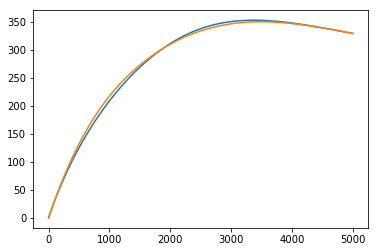

In [232]:
import matplotlib.pyplot as plt
%matplotlib inline
        
e = es[0]

curve = nurbs.Curve.Curve()
curve.ctrlpts = [p[:2]  for p in e.control_points]
curve.degree = e.degree

curve.knotvector = nurbs.utilities.knotvector_autogen(curve.degree, len(curve.ctrlpts))
curve.evaluate_rational()
plt.plot([p[0] for p in curve.curvepts], [p[1] for p in curve.curvepts])

curve.knotvector = e.knots
curve.weights = e.weights
curve.evaluate_rational()
plt.plot([p[0] for p in curve.curvepts], [p[1] for p in curve.curvepts])


In [229]:
e.__dict__

{'color': 256,
 'control_points': [(0.0, 0.0, 0.0),
  (490.717092713168, 158.8075309082932, 0.0),
  (2164.905820751131, 388.1223313710202, 0.0),
  (3837.689038507039, 353.4902462273104, 0.0),
  (4994.861260930288, 329.5329955163307, 0.0)],
 'degree': 3,
 'dxftype': 'SPLINE',
 'end_tangent': None,
 'extrusion': (0.0, 0.0, 1.0),
 'fit_points': [(0.0, 0.0, 0.0),
  (1522.67200320285, 275.0960618560202, 0.0),
  (4994.861260930288, 329.5329955163307, 0.0)],
 'flags': 1064,
 'handle': '3D',
 'invisible': 0,
 'knots': [0.0,
  0.0,
  0.0,
  0.0,
  1547.322808138777,
  5019.938770381674,
  5019.938770381674,
  5019.938770381674,
  5019.938770381674],
 'layer': 'PLOTLINES',
 'layout_tab_name': None,
 'line_weight': 0,
 'linetype': None,
 'ltscale': 1.0,
 'normal_vector': (0.0, 0.0, 1.0),
 'owner': '157',
 'paperspace': None,
 'shadow_mode': None,
 'start_tangent': (0.9514183274466854, 0.3079012279913022, 0.0),
 'thickness': 0.0,
 'tol_control_point': 1e-10,
 'tol_fit_point': 0.0,
 'tol_knot': 1e-

In [207]:
import nurbs.Curve, nurbs.utilities
help(nurbs.Curve)

Help on module nurbs.Curve in nurbs:

NAME
    nurbs.Curve

DESCRIPTION
    .. module:: Curve
        :platform: Unix, Windows
        :synopsis: A data storage and evaluation class for B-spline and NURBS curves
    
    .. moduleauthor:: Onur Rauf Bingol

CLASSES
    builtins.object
        Curve
    
    class Curve(builtins.object)
     |  A data storage and evaluation class for B-Spline and NURBS curves.
     |  
     |  **Data Storage**
     |  
     |  :class:`.Curve` class implements Python properties using the ``@property`` decorator. The following properties are present in this class:
     |  
     |  * degree
     |  * knotvector
     |  * delta
     |  * ctrlpts
     |  * ctrlptsw
     |  * weights
     |  * curvepts
     |  
     |  The functions :func:`.read_ctrlpts()` and :func:`.read_ctrlptsw()` provide an easy way to read control points from a text file.
     |  Additional details for the text format can be found in `FORMATS.md <https://github.com/orbingol/NURBS-Python/

In [14]:
es = [e  for e in d.entities  if e.dxftype == "LWPOLYLINE"]
es

[]